In [1]:
import pandas as pd
from utils import (get_data, display_results,
                   get_label_encoder, get_train_dev_test)

# Exploration

In [2]:
df = get_data()
for i in df["Lang"].unique():
    df[df["Lang"] == i].to_csv(f"data/{i}.csv", index=False)

In [3]:
lang = df["Lang"].unique()
lang

array(['GER', 'TUR', 'CHI', 'TEL', 'ARA', 'SPA', 'HIN', 'JPN', 'KOR',
       'FRE', 'ITA'], dtype=object)

In [4]:
lang = df["Lang"].unique()
res = {}
for l in lang:
    res[l] = {}

for i in df["Lang"].unique():
    res[i]["nb"] = df[df["Lang"] == i]["Lang"].count()
    res[i]["moy length"] = df[df["Lang"] == i]["Text"].str.len().mean()
    res[i]["max length"] = df[df["Lang"] == i]["Text"].str.len().max()
    res[i]["min length"] = df[df["Lang"] == i]["Text"].str.len().min()
    res[i]["esperance length"] = df[df["Lang"] == i]["Text"].str.len().std()
    res[i]["moy nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().mean()
    res[i]["max nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().max()
    res[i]["min nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().min()
    res[i]["esperance nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().std()
    res[i]["moy nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().mean()
    res[i]["max nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().max()
    res[i]["min nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().min()
    res[i]["esperance nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().std()
    

    print(  
        "lang =", i, ", nb=", round(df[df["Lang"] == i]["Lang"].count(), 3), 
        ", moy length=", round(df[df["Lang"] == i]["Text"].str.len().mean(), 3), 
        ", max length=", round(df[df["Lang"] == i]["Text"].str.len().max(), 3),
        ", min length=", round(df[df["Lang"] == i]["Text"].str.len().min(), 3),
        ", esperance length=", round(df[df["Lang"] == i]["Text"].str.len().std(), 3),
        ", moy nb mot :", round(df[df["Lang"] == i]["Text"].str.split().str.len().mean(), 3),
        ", max nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().max(), 3),
        ", min nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().min(), 3),
        ", esperance nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().std(), 3),
        ", moy nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().mean(), 3),
        ", max nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().max(), 3),
        ", min nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().min(), 3),
        ", esperance nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().std(), 3),
    )


lang = GER , nb= 900 , moy length= 1953.983 , max length= 4142 , min length= 334 , esperance length= 367.666 , moy nb mot : 376.533 , max nb mot: 806 , min nb mot: 63 , esperance nb mot: 69.772 , moy nb phrase: 18.434 , max nb phrase: 40 , min nb phrase: 5 , esperance nb phrase: 4.336
lang = TUR , nb= 900 , moy length= 1842.998 , max length= 4155 , min length= 69 , esperance length= 437.412 , moy nb mot : 352.671 , max nb mot: 776 , min nb mot: 15 , esperance nb mot: 83.303 , moy nb phrase: 18.611 , max nb phrase: 44 , min nb phrase: 1 , esperance nb phrase: 5.567
lang = CHI , nb= 900 , moy length= 1853.389 , max length= 4621 , min length= 92 , esperance length= 432.715 , moy nb mot : 361.812 , max nb mot: 876 , min nb mot: 16 , esperance nb mot: 82.095 , moy nb phrase: 18.448 , max nb phrase: 38 , min nb phrase: 2 , esperance nb phrase: 5.329
lang = TEL , nb= 900 , moy length= 1901.13 , max length= 4074 , min length= 748 , esperance length= 386.245 , moy nb mot : 359.039 , max nb mot:

In [5]:
df["length"] = df["Text"].str.len()
df["mot"] = df["Text"].str.split().str.len()
df["phrase"] = df["Text"].str.split(".").str.len()

# Machine learning

## Implémentations

### imports

In [7]:
# modèles
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import plotly.express as px

from utils import train_one_model

## Logistic Regression full dataset

In [8]:

df = get_data()
X = df["Text"]
y = df["Lang"]

X_train, X_dev, X_test, y_train, y_dev, y_test = get_train_dev_test(X, y)
label_encoder, labels = get_label_encoder(df["Lang"])

train_one_model(CountVectorizer(), LogisticRegression(), labels, label_encoder, X_train, y_train, X_dev, y_dev, X_test, y_test, draw=True)

Accuracy DEV CountVectorizer() et LogisticRegression(): 0.600


Accuracy  0.6
Precision - macro
precision score  0.6041851091438246
Recall - macro
recall score  0.601473028617261
F1 - macro
f1 score  0.5974979061430769
Accuracy TEST CountVectorizer() et LogisticRegression(): 0.598


Accuracy  0.597979797979798
Precision - macro
precision score  0.604687736990802
Recall - macro
recall score  0.5966381842313571
F1 - macro
f1 score  0.5910894603994502


## Logistic Regression on CHI KOR JAP

In [9]:
df_chi = pd.read_csv("data/CHI.csv")
df_kor = pd.read_csv("data/KOR.csv")
df_jap = pd.read_csv("data/JPN.csv")

df_concat = pd.concat([df_chi, df_kor, df_jap])
X = df_concat["Text"]
y = df_concat["Lang"]

X_train, X_dev, X_test, y_train, y_dev, y_test = get_train_dev_test(X, y)
label_encoder, labels = get_label_encoder(df_concat["Lang"])
train_one_model(CountVectorizer(), LogisticRegression(), labels, label_encoder, X_train, y_train, X_dev, y_dev, X_test, y_test, draw=True)

Accuracy DEV CountVectorizer() et LogisticRegression(): 0.674


Accuracy  0.674074074074074
Precision - macro
precision score  0.6707790998640671
Recall - macro
recall score  0.6723475355054301
F1 - macro
f1 score  0.6703638830822154
Accuracy TEST CountVectorizer() et LogisticRegression(): 0.693


Accuracy  0.6925925925925925
Precision - macro
precision score  0.6934865900383141
Recall - macro
recall score  0.6996248196248196
F1 - macro
f1 score  0.6952841841343583


## Pipeline

In [10]:
def process_pipeline(pipeline, df, draw=False):
    label_encoder, labels = get_label_encoder(df["Lang"])

    X = df["Text"]
    y = df["Lang"]
    X_train, X_dev, X_test, y_train, y_dev, y_test = get_train_dev_test(X, y)

    y_train_labels = label_encoder.transform(y_train)
    y_dev_labels = label_encoder.transform(y_dev)

    pipeline.fit(X_train, y_train_labels)

    y_pred_dev = pipeline.predict(X_dev)
    display_results(y_dev_labels, y_pred_dev, labels, draw)

In [11]:
# LinearSVC(dual="auto", random_state=0, tol=1e-5)
clf = make_pipeline(
    TfidfVectorizer(), 
    # StandardScaler(with_mean=False),
    #LinearSVC(dual="auto", random_state=0, tol=1e-5),
    #KNeighborsClassifier(n_neighbors=3)
    # LogisticRegression()
    # DecisionTreeClassifier()
    # RandomForestClassifier()
    SGDClassifier()
)

df_chi = pd.read_csv("data/CHI.csv")
df_chi = df_chi.sample(300)
df_kor = pd.read_csv("data/KOR.csv")
df_kor = df_kor.sample(300)
df_jap = pd.read_csv("data/JPN.csv")
df_jap = df_jap.sample(300)
df_asie = pd.concat([df_chi, df_kor, df_jap])
df_asie["Lang"] = "ASI"

df_hin = pd.read_csv("data/HIN.csv")
df_hin = df_hin.sample(450)
df_tel = pd.read_csv("data/TEL.csv")
df_tel = df_tel.sample(450)
df_indian = pd.concat([df_hin, df_tel])
df_indian["Lang"] = "IND"


df_other = get_data(exclude=["HIN", "TEL", "CHI", "JPN", "KOR"])
df_concat = pd.concat([df_other, df_asie, df_indian])
process_pipeline(clf, df_concat, draw=True)

Accuracy  0.7833333333333333
Precision - macro
precision score  0.7795503153585515
Recall - macro
recall score  0.7771310767740363
F1 - macro
f1 score  0.7768784438439216


In [12]:
def process_one_vs_all(Lang, clf, draw=False):
    df_other = get_data(exclude=[Lang])
    df_other["Lang"] = "OTH"
    df_other = df_other.sample(900)
    df_spa = get_data(include=[Lang])

    df_concat = pd.concat([df_other, df_spa])
    process_pipeline(clf, df_concat, draw)

In [13]:
clf = make_pipeline(
    CountVectorizer(), 
    # StandardScaler(with_mean=False),
    # LinearSVC(dual="auto", random_state=0, tol=1e-5),
    # KNeighborsClassifier(n_neighbors=3)
    # LogisticRegression()
    # DecisionTreeClassifier()
    # RandomForestClassifier()
    SGDClassifier()
)

for lang in df["Lang"].unique():
    process_one_vs_all(lang, clf, draw=True)

Accuracy  0.8833333333333333
Precision - macro
precision score  0.8850106529640306
Recall - macro
recall score  0.8809523809523809
F1 - macro
f1 score  0.8822833297001027


Accuracy  0.7611111111111111
Precision - macro
precision score  0.7916666666666666
Recall - macro
recall score  0.7592912705272257
F1 - macro
f1 score  0.7538089633894207


Accuracy  0.7055555555555556
Precision - macro
precision score  0.7740740740740741
Recall - macro
recall score  0.7055555555555556
F1 - macro
f1 score  0.6859259259259259


Accuracy  0.85
Precision - macro
precision score  0.8570889894419307
Recall - macro
recall score  0.8507840474132609
F1 - macro
f1 score  0.849437714923015


Accuracy  0.8
Precision - macro
precision score  0.7997242762250909
Recall - macro
recall score  0.7970438454850329
F1 - macro
f1 score  0.797979797979798


Accuracy  0.7888888888888889
Precision - macro
precision score  0.7872023809523809
Recall - macro
recall score  0.7882030861124938
F1 - macro
f1 score  0.7876040243448019


Accuracy  0.8388888888888889
Precision - macro
precision score  0.8481781376518218
Recall - macro
recall score  0.8397950364242499
F1 - macro
f1 score  0.8380441190158543


Accuracy  0.7722222222222223
Precision - macro
precision score  0.8220918139949487
Recall - macro
recall score  0.7677865612648221
F1 - macro
f1 score  0.7610026231419411


Accuracy  0.8055555555555556
Precision - macro
precision score  0.8063241106719368
Recall - macro
recall score  0.8071207430340557
F1 - macro
f1 score  0.8055015282022784


Accuracy  0.7722222222222223
Precision - macro
precision score  0.7816295546558705
Recall - macro
recall score  0.775120504263997
F1 - macro
f1 score  0.7713683819201338


Accuracy  0.8333333333333334
Precision - macro
precision score  0.8325098814229248
Recall - macro
recall score  0.8349925335988053
F1 - macro
f1 score  0.8328173374613003


# Cross Validation

## Shuffle

In [14]:
for i in df["Lang"].unique():
    df_ara = pd.read_csv(f"data/{i}.csv")
    df_ara.sample(frac=1).reset_index(drop=True).to_csv(f"data/{i}.csv", index=False)

In [15]:
import pandas as pd
import glob
import random

files = glob.glob("data/*.csv")

# Read lines from each file
lines_from_each_file = []
for file_path in files:
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]
        lines_from_each_file.append(lines)

# Alternate lines from each file with random order in each cycle
combined_lines = []
num_lines = len(lines_from_each_file[0])
for i in range(num_lines):
    # Shuffle the order of files for each line
    random.shuffle(lines_from_each_file)

    # Add one line from each file in the shuffled order
    for lines in lines_from_each_file:
        combined_lines.append(lines[i])

# Create DataFrame
df = pd.DataFrame([line.split(r',"') for line in combined_lines])
df.drop(columns=[2], inplace=True)
df.head(15)


,0,1
0,SPA,"When I was young , I used to think that `` ol..."
1,GER,"I disagree with the statement , because I thi..."
2,FRE,I generaly try to hire a good guide tour duri...
3,ARA,Since Ford started to produce cars in great n...
4,TUR,MORE CARS Cars are one of the most effective ...
5,GER,IThe importance and popularity of travelling ...
6,KOR,"In my country , there is an old say ; to teac..."
7,HIN,I agree with the statement `` sucessful peopl...
8,CHI,`` It is more important for students to under...
9,JPN,I disagree with that it is more important for...


In [16]:
tel = pd.read_csv("data/TEL.csv")
hin = pd.read_csv("data/HIN.csv")
chi = pd.read_csv("data/CHI.csv")
fre = pd.read_csv("data/FRE.csv")
ita = pd.read_csv("data/ITA.csv")

tel_hin = pd.concat([tel, hin])
tel_hin

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(tel_hin["Text"])
y = tel_hin["Lang"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled = scaler.transform(X_train)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y_train.values.ravel())

# Make predictions on the test set
# scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
y_pred = model.predict(scaler.transform(X_test))

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7416666666666667


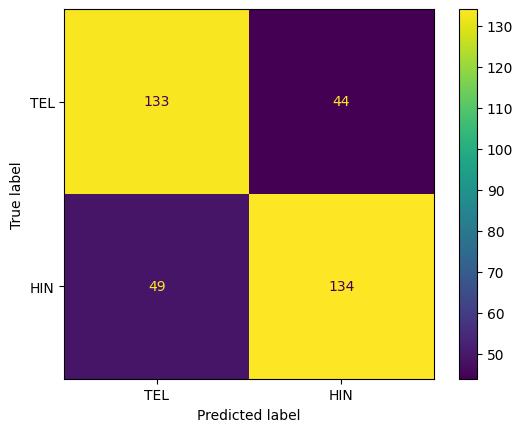

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test, labels=tel_hin["Lang"].unique()), display_labels=tel_hin["Lang"].unique()).plot()

# SVM

In [21]:
from sklearn.svm import SVC

# Vectorize the text and combine with other numerical features
vectorizer = TfidfVectorizer()
df = get_data()
df["length"] = df["Text"].str.len()
df["mot"] = df["Text"].str.split().str.len()
df["phrase"] = df["Text"].str.split(".").str.len()
X_text = vectorizer.fit_transform(df['Text'])
X_other_numerical = df[["mot", "length", "phrase"]].values
X_all = hstack((X_text, X_other_numerical))

X_train, X_test, y_train, y_test = train_test_split(X_text, df[["Lang"]], test_size=0.4, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_scaled_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = svm_model.predict(X_scaled_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.30707070707070705
